In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('gaming_stocks.csv', encoding='utf-8')
df.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,...,Longbusinesssummary,Weight,Date,Symbol_1,Adj Close,Close,High,Low,Open,Volume
0,NMS,EA,Electronic Arts Inc.,Electronic Arts Inc.,Communication Services,Electronic Gaming & Multimedia,132.88,35396444160,1982000000,-0.051,...,"Electronic Arts Inc. develops, markets, publis...",0.000719,1/4/2010 0:00,EA,17.774704,18.150000,18.240000,17.889999,17.990000,3850500
1,NMS,EA,Electronic Arts Inc.,Electronic Arts Inc.,Communication Services,Electronic Gaming & Multimedia,132.88,35396444160,1982000000,-0.051,...,"Electronic Arts Inc. develops, markets, publis...",0.000719,1/5/2010 0:00,EA,18.274151,18.660000,18.870001,18.230000,18.309999,6632500
2,NMS,EA,Electronic Arts Inc.,Electronic Arts Inc.,Communication Services,Electronic Gaming & Multimedia,132.88,35396444160,1982000000,-0.051,...,"Electronic Arts Inc. develops, markets, publis...",0.000719,1/6/2010 0:00,EA,17.804085,18.180000,18.650000,18.059999,18.610001,5047300
3,NMS,EA,Electronic Arts Inc.,Electronic Arts Inc.,Communication Services,Electronic Gaming & Multimedia,132.88,35396444160,1982000000,-0.051,...,"Electronic Arts Inc. develops, markets, publis...",0.000719,1/7/2010 0:00,EA,17.666979,18.040001,18.070000,17.780001,17.910000,5433200
4,NMS,EA,Electronic Arts Inc.,Electronic Arts Inc.,Communication Services,Electronic Gaming & Multimedia,132.88,35396444160,1982000000,-0.051,...,"Electronic Arts Inc. develops, markets, publis...",0.000719,1/8/2010 0:00,EA,18.019533,18.400000,18.450001,18.030001,18.180000,4055600


In [4]:
# Keep the columns we want to train on while getting rid of all the others
df = df[['Symbol','Shortname','Date', 'Close']]

# Double check the result
df

,Symbol,Shortname,Date,Close
0,EA,Electronic Arts Inc.,1/4/2010 0:00,18.150000
1,EA,Electronic Arts Inc.,1/5/2010 0:00,18.660000
2,EA,Electronic Arts Inc.,1/6/2010 0:00,18.180000
3,EA,Electronic Arts Inc.,1/7/2010 0:00,18.040001
4,EA,Electronic Arts Inc.,1/8/2010 0:00,18.400000
...,...,...,...,...
4019,TTWO,"Take-Two Interactive Software,",12/24/2013 0:00,17.670000
4020,TTWO,"Take-Two Interactive Software,",12/26/2013 0:00,17.879999
4021,TTWO,"Take-Two Interactive Software,",12/27/2013 0:00,17.680000
4022,TTWO,"Take-Two Interactive Software,",12/30/2013 0:00,17.400000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Symbol     4024 non-null   object 
 1   Shortname  4024 non-null   object 
 2   Date       4024 non-null   object 
 3   Close      4024 non-null   float64
dtypes: float64(1), object(3)
memory usage: 125.9+ KB


In [6]:
import datetime
def str_to_datetime(date_str):
    # Custom logic to convert date_str to datetime object
    return pd.to_datetime(date_str)

# Apply the custom function to the 'Date' column
df['Date'] = df['Date'].apply(str_to_datetime)

# Display the converted Date column
print(df['Date'])

0      2010-01-04
1      2010-01-05
2      2010-01-06
3      2010-01-07
4      2010-01-08
          ...    
4019   2013-12-24
4020   2013-12-26
4021   2013-12-27
4022   2013-12-30
4023   2013-12-31
Name: Date, Length: 4024, dtype: datetime64[ns]


In [7]:
df.index = df.pop('Date')
df

,Symbol,Shortname,Close
Date,,,
2010-01-04,EA,Electronic Arts Inc.,18.150000
2010-01-05,EA,Electronic Arts Inc.,18.660000
2010-01-06,EA,Electronic Arts Inc.,18.180000
2010-01-07,EA,Electronic Arts Inc.,18.040001
2010-01-08,EA,Electronic Arts Inc.,18.400000
...,...,...,...
2013-12-24,TTWO,"Take-Two Interactive Software,",17.670000
2013-12-26,TTWO,"Take-Two Interactive Software,",17.879999
2013-12-27,TTWO,"Take-Two Interactive Software,",17.680000


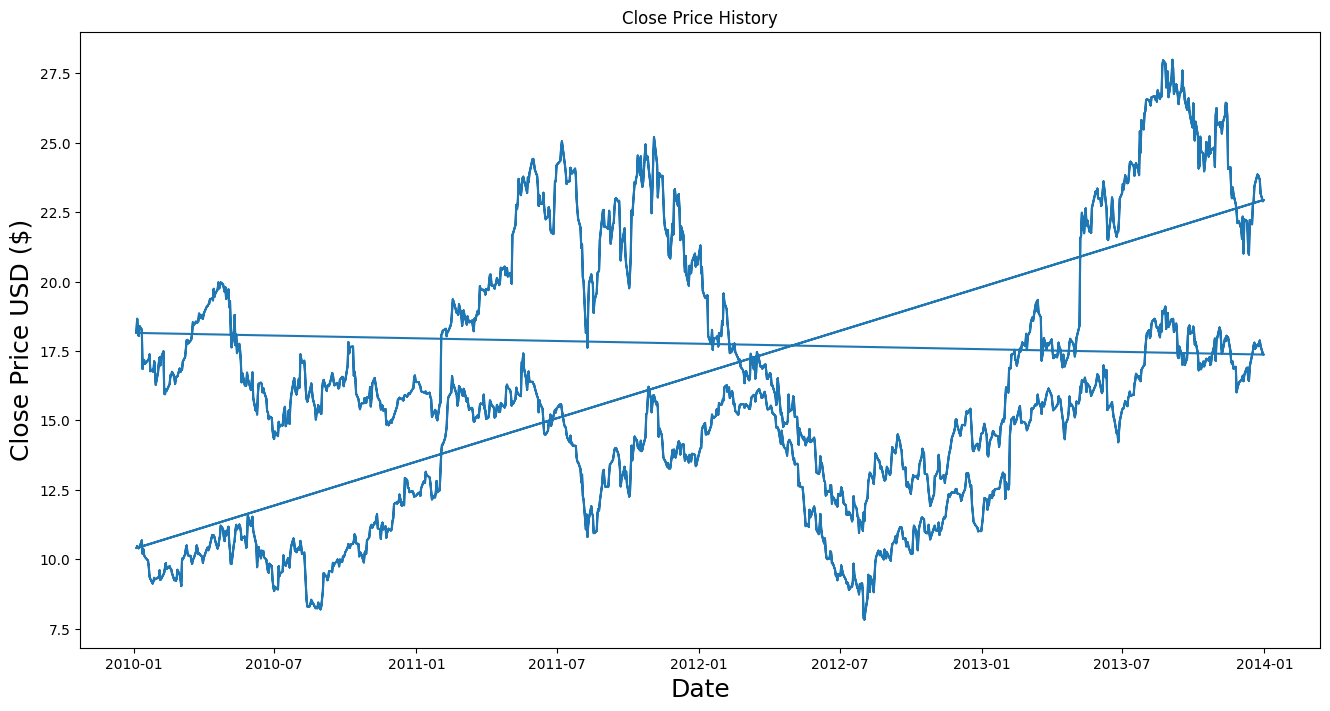

In [16]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [9]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

3220

In [10]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.51214674],
       [0.53743182],
       [0.51363413],
       ...,
       [0.48884484],
       [0.4749628 ],
       [0.4734755 ]])

In [11]:
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.51214674, 0.53743182, 0.51363413, 0.50669316, 0.52454138,
       0.51809621, 0.44769462, 0.46355975, 0.46405554, 0.45661878,
       0.46355975, 0.46554284, 0.4739712 , 0.44372833, 0.44670302,
       0.44224094, 0.46157656, 0.44372833, 0.41943484, 0.44224094,
       0.45860187, 0.46851762, 0.45413979, 0.46802183, 0.47942488,
       0.40356966, 0.40257806, 0.41150227, 0.40852749, 0.42092214,
       0.43678727, 0.43480417, 0.44273674, 0.43480417, 0.42092214,
       0.43133369, 0.43331678, 0.43430837, 0.44868621, 0.44224094,
       0.44571143, 0.44620722, 0.46108086, 0.46901342, 0.48388696,
       0.49925629, 0.49975209, 0.49330692, 0.49826479, 0.50074368,
       0.51165094, 0.53098665, 0.52553298, 0.53247395, 0.53049085,
       0.53098665, 0.53247395, 0.54685178, 0.53842342, 0.54387709])]
[0.5374318241967075]

[array([0.51214674, 0.53743182, 0.51363413, 0.50669316, 0.52454138,
       0.51809621, 0.44769462, 0.46355975, 0.46405554, 0.45661878,
       0.46355975, 0.46554284, 0.473

In [13]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
3160/3160 [==============================] - 105s 32ms/step - loss: 0.0027
Epoch 2/5
3160/3160 [==============================] - 104s 33ms/step - loss: 0.0012
Epoch 3/5
3160/3160 [==============================] - 102s 32ms/step - loss: 0.0011
Epoch 4/5
3160/3160 [==============================] - 103s 33ms/step - loss: 9.8861e-04
Epoch 5/5
3160/3160 [==============================] - 102s 32ms/step - loss: 0.0011


In [14]:
#Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

26/26 [==============================] - 1s 16ms/step


0.3837733263731517

An RMSE of 0.38377 indicates that, on average, the difference between the predicted values and the actual values is about 0.38377 units. A RMSE of 0.38377 indicates a moderate level of error.

## Visualizing Predictions

<ipython-input-15-c4aee32f125a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


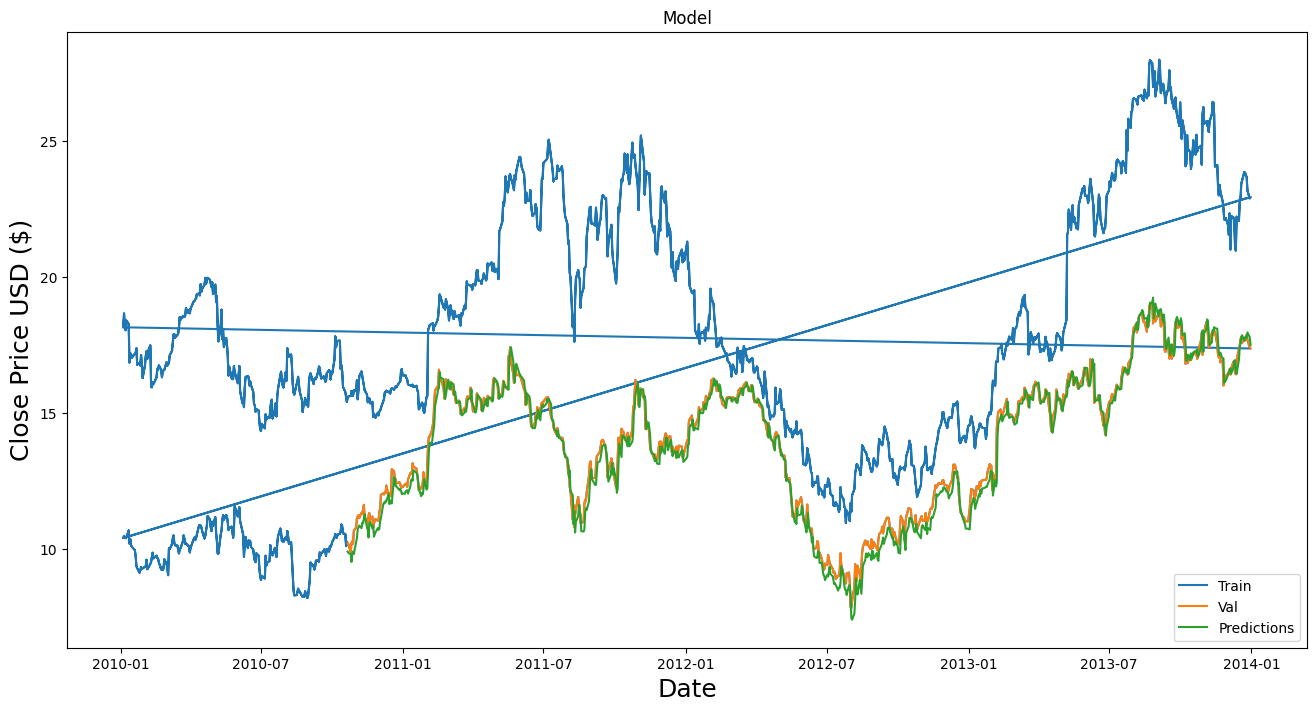

In [15]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()